In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import ast

In [19]:
data = pd.read_json("Data.json", lines=True)

In [20]:
data.head()

,reviewerID,asin,reviewerName,helpful,reviewText,overall,summary,unixReviewTime,reviewTime
0,A2IBPI20UZIR0U,1384719342,"cassandra tu ""Yeah, well, that's just like, u...","[0, 0]","Not much to write about here, but it does exac...",5,good,1393545600,"02 28, 2014"
1,A14VAT5EAX3D9S,1384719342,Jake,"[13, 14]",The product does exactly as it should and is q...,5,Jake,1363392000,"03 16, 2013"
2,A195EZSQDW3E21,1384719342,"Rick Bennette ""Rick Bennette""","[1, 1]",The primary job of this device is to block the...,5,It Does The Job Well,1377648000,"08 28, 2013"
3,A2C00NNG1ZQQG2,1384719342,"RustyBill ""Sunday Rocker""","[0, 0]",Nice windscreen protects my MXL mic and preven...,5,GOOD WINDSCREEN FOR THE MONEY,1392336000,"02 14, 2014"
4,A94QU4C90B1AX,1384719342,SEAN MASLANKA,"[0, 0]",This pop filter is great. It looks and perform...,5,No more pops when I record my vocals.,1392940800,"02 21, 2014"


In [30]:
data.shape

(10261, 9)

In [32]:
data.columns.tolist()

['reviewerID',
 'asin',
 'reviewerName',
 'helpful',
 'reviewText',
 'overall',
 'summary',
 'unixReviewTime',
 'reviewTime']

In [34]:
data.dtypes

reviewerID        object
asin              object
reviewerName      object
helpful           object
reviewText        object
overall            int64
summary           object
unixReviewTime     int64
reviewTime        object
dtype: object

In [35]:
data.isnull().sum()

reviewerID         0
asin               0
reviewerName      27
helpful            0
reviewText         0
overall            0
summary            0
unixReviewTime     0
reviewTime         0
dtype: int64

In [56]:
data.describe()

,overall,unixReviewTime
count,10261.000000,1.026100e+04
mean,4.488744,1.360606e+09
std,0.894642,3.779735e+07
min,1.000000,1.095466e+09
25%,4.000000,1.343434e+09
50%,5.000000,1.368490e+09
75%,5.000000,1.388966e+09
max,5.000000,1.405987e+09


In [37]:
categorical_columns = ['reviewerID', 'asin', 'reviewerName', 'summary']
for col in categorical_columns:
    print(f"\nUnique values in {col}: {data[col].nunique()}")


Unique values in reviewerID: 1429

Unique values in asin: 900

Unique values in reviewerName: 1397

Unique values in summary: 8852


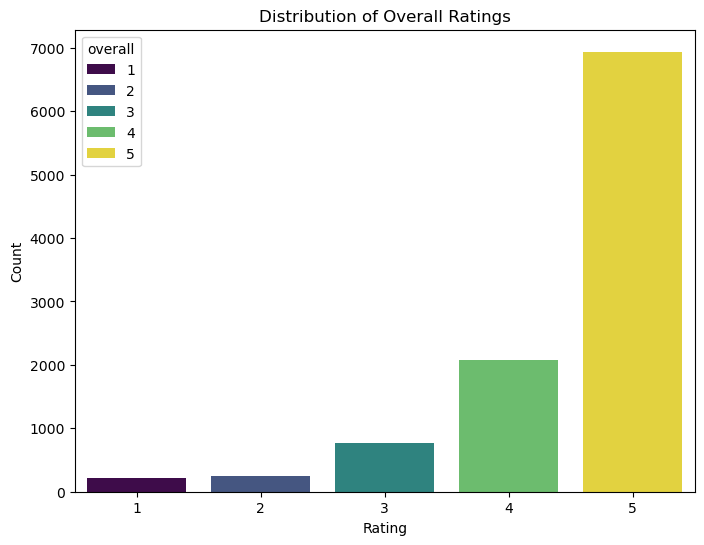

Average Rating: 4.49


In [39]:
plt.figure(figsize=(8, 6))
sns.countplot(data=data, x='overall', palette='viridis',hue='overall')
plt.title("Distribution of Overall Ratings")
plt.xlabel("Rating")
plt.ylabel("Count")
plt.show()

avg_rating = data['overall'].mean()
print(f"Average Rating: {avg_rating:.2f}")

In [64]:
# Convert the 'helpful' column from string to list
data['helpful'] = data['helpful'].apply(lambda x: ast.literal_eval(x) if isinstance(x, str) else x)

print(data['helpful'].head())

0      [0, 0]
1    [13, 14]
2      [1, 1]
3      [0, 0]
4      [0, 0]
Name: helpful, dtype: object


In [58]:
# Extract helpful votes and total votes
data['helpful_votes'] = data['helpful'].apply(lambda x: x[0])
data['total_votes'] = data['helpful'].apply(lambda x: x[1])

# Add a new column for helpfulness ratio (avoid division by zero)
data['helpfulness_ratio'] = np.where(data['total_votes'] > 0, data['helpful_votes'] / data['total_votes'], 0)

# Verify the new columns
print(data[['helpful', 'helpful_votes', 'total_votes', 'helpfulness_ratio']].head())

    helpful  helpful_votes  total_votes  helpfulness_ratio
0    [0, 0]              0            0           0.000000
1  [13, 14]             13           14           0.928571
2    [1, 1]              1            1           1.000000
3    [0, 0]              0            0           0.000000
4    [0, 0]              0            0           0.000000


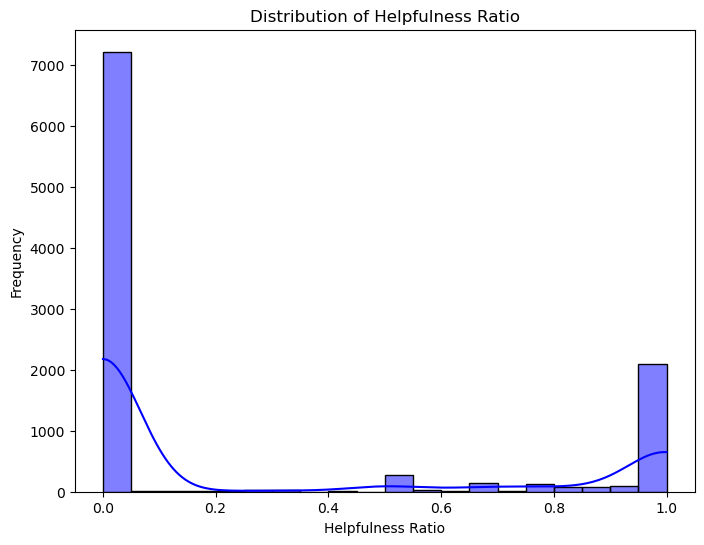

In [59]:
plt.figure(figsize=(8, 6))
sns.histplot(data['helpfulness_ratio'], bins=20, kde=True, color='blue')
plt.title("Distribution of Helpfulness Ratio")
plt.xlabel("Helpfulness Ratio")
plt.ylabel("Frequency")
plt.show()

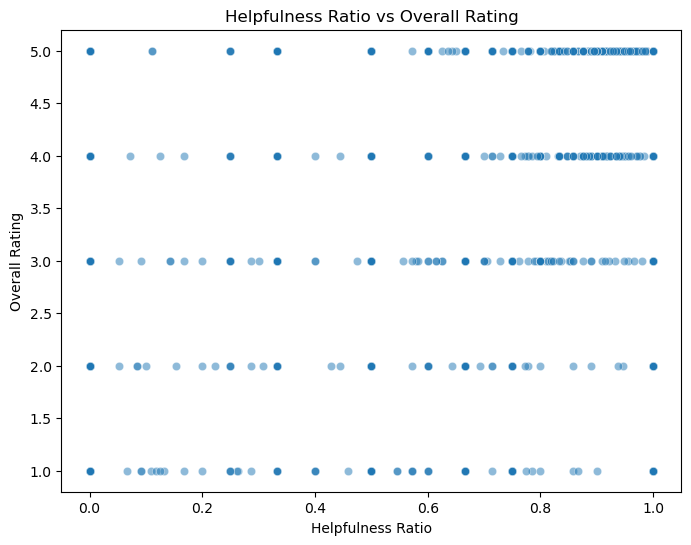

In [60]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='helpfulness_ratio', y='overall', alpha=0.5)
plt.title("Helpfulness Ratio vs Overall Rating")
plt.xlabel("Helpfulness Ratio")
plt.ylabel("Overall Rating")
plt.show()

In [61]:
# Calculate the length of reviewText
data['review_length'] = data['reviewText'].apply(lambda x: len(str(x).split()))

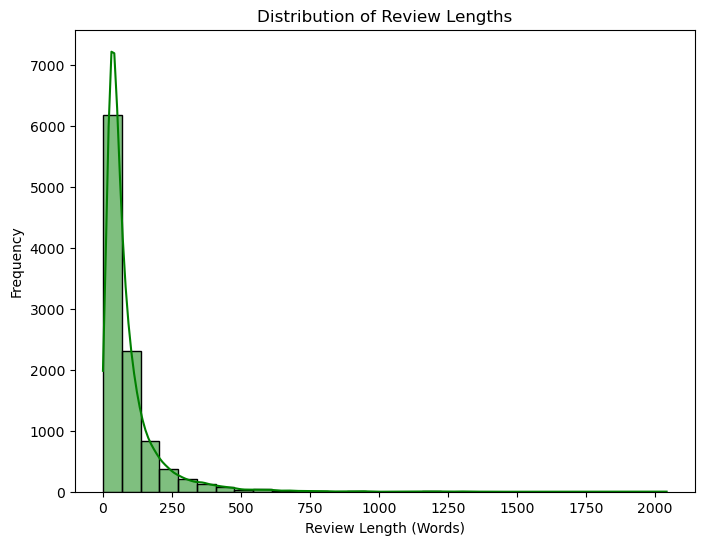

In [65]:
plt.figure(figsize=(8, 6))
sns.histplot(data['review_length'], bins=30, kde=True, color='green')
plt.title("Distribution of Review Lengths")
plt.xlabel("Review Length (Words)")
plt.ylabel("Frequency")
plt.show()

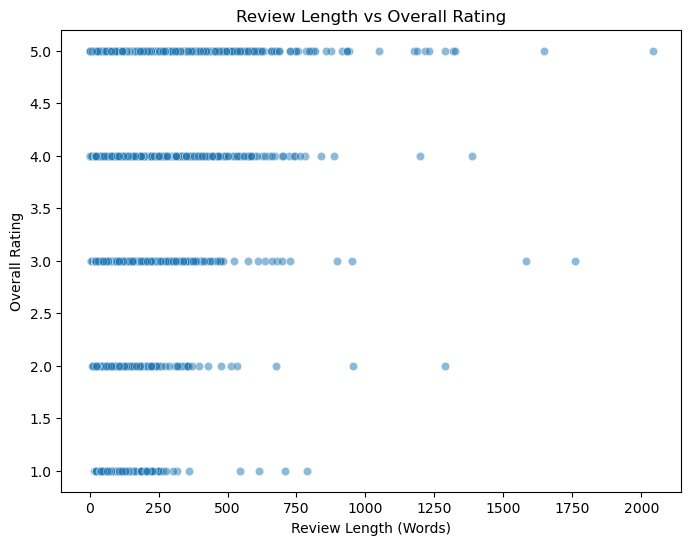

In [66]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='review_length', y='overall', alpha=0.5)
plt.title("Review Length vs Overall Rating")
plt.xlabel("Review Length (Words)")
plt.ylabel("Overall Rating")
plt.show()